**About the Dataset**:
The dataset used in this project is BreastMNIST, sourced from the MedMNIST2D dataset collection. BreastMNIST consists of breast ultrasound images aimed at identifying abnormalities. While the original dataset categorizes images into three classes—normal, benign, and malignant—due to the low resolution of the images, it has been simplified into a binary classification problem. In this version, normal and benign cases are grouped together as "Normal/Benign," while malignant cases are labeled as "Malignant."

**Aim of the Project**:
The goal of this project is to classify breast ultrasound images as either normal/benign or malignant using two models: a GoogLeNet-inspired Convolutional Neural Network (CNN) and a custom-designed CNN. The process will involve loading and preprocessing the dataset, building both CNN models, and then evaluating their performance.

In [1]:
!pip install streamlit medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=d2afa9ddb20103be307531024ceaa4930ee0502bc3309c216fdfb539d77b0186
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [2]:
#Importing Packages
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import medmnist
from medmnist import INFO, Evaluator

In [3]:
def data_download(data):
    # Display dataset source information, including the version of MedMNIST and its homepage link
    print(f"Dataset source information: MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

    download = True  # Set download flag to True to ensure datasets are downloaded
    info = INFO[data]  # Retrieve the dataset information from the INFO dictionary using the data key
    DataClass = getattr(medmnist, info['python_class'])  # Dynamically get the dataset class from medmnist

    # Print the name and description of the selected dataset (BreastMNIST)
    print('\nBreastMNIST')
    print(info['description'])

    # Inner function to download a specific split of the dataset (train, validation, or test)
    def download_split(split):
        dataset = DataClass(split=split, download=download)  # Download the dataset for the specified split
        # If the images are in 3D format (height, width, depth), add a channel dimension to make them 4D (batch_size, height, width, channels)
        if dataset.imgs.ndim == 3:
            print(f'Adding channel to {split} images...')
            dataset.imgs = np.expand_dims(dataset.imgs, axis=-1)  # Add an additional dimension for the image channel
        return dataset  # Return the downloaded dataset

    # Download the training, validation, and test datasets
    train_dataset = download_split('train')  # Download training set
    val_dataset = download_split('val')  # Download validation set
    test_dataset = download_split('test')  # Download test set

    # Print information about each dataset (training, validation, and test)
    for name, dataset in zip(['Training', 'Validation', 'Testing'], [train_dataset, val_dataset, test_dataset]):
        print(f'\n{name} Dataset:')
        print(dataset)  # Print the dataset object details

    # Print the shapes of the images in each dataset (training, validation, and test)
    print('\nShapes of images:')
    print('Training: ', train_dataset.imgs.shape)  # Shape of training images
    print('Validation: ', val_dataset.imgs.shape)  # Shape of validation images
    print('Testing: ', test_dataset.imgs.shape)  # Shape of test images

    # Return the downloaded datasets (train, validation, and test)
    return train_dataset, val_dataset, test_dataset

In [4]:
train_dataset, val_dataset, test_dataset = data_download('breastmnist')

Dataset source information: MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/

BreastMNIST
The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.


100%|██████████| 559580/559580 [00:00<00:00, 752625.36it/s] 


Adding channel to train images...
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Adding channel to val images...
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Adding channel to test images...

Training Dataset:
Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 546
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×5

**Dataset Preprocessing**

In this code, I perform two essential tasks to ensure the quality and consistency of my dataset: normalizing the image pixel values and checking for missing images.

First, I normalize the pixel values of the images in the training, validation, and test datasets by dividing them by 255.0. This scaling adjusts the pixel values from their original range of 0-255 to a range of 0-1. I do this because normalization is a common preprocessing step in deep learning that helps my model converge faster during training and ensures that different input features are on a similar scale.

Next, I define and use the check_missing_images function to verify that the expected number of images is present in each dataset (training, validation, and testing). This function compares the actual count of images in each dataset with the expected count and prints a warning if there is a mismatch. By checking for missing images, I ensure that my dataset is complete and that there are no discrepancies, which could negatively impact my model's training and evaluation.

In summary, this code is crucial for me to maintain data consistency and integrity, as normalization improves my model's learning process, and the missing image check ensures that my dataset is intact and reliable.

In [5]:
labels = ['Malignant', 'Normal/Benign'] # Creating the classification labels

In [6]:
# Normalising images in the dataset
train_dataset.imgs = train_dataset.imgs/255.0
val_dataset.imgs = val_dataset.imgs/255.0
test_dataset.imgs = test_dataset.imgs/255.0

In [7]:
# Function to check for missing images in the dataset
def check_missing_images(dataset, expected_count, dataset_name):
    actual_count = len(dataset.imgs)
    if actual_count != expected_count:
        print(f"WARNING: Missing images in {dataset_name} dataset.")
        print(f"Found {actual_count}, should be {expected_count}.")
    else:
        print(f"There are no missing images in {dataset_name} dataset.")

# Check missing images in all datasets
check_missing_images(train_dataset, 546, "training")
check_missing_images(val_dataset, 78, "validation")
check_missing_images(test_dataset, 156, "testing")

There are no missing images in training dataset.
There are no missing images in validation dataset.
There are no missing images in testing dataset.


**Addressing Dataset Class Imbalence**


In this code, I address two important aspects of training a Convolutional Neural Network (CNN) on an imbalanced dataset: handling class imbalance and augmenting training data to improve model generalization. First, the compute_class_weights function calculates class weights based on the distribution of the training labels to mitigate the impact of class imbalance. By assigning higher weights to underrepresented classes (e.g., malignant cases), the model is encouraged to pay more attention to them during training, improving its performance on minority classes. The computed weights are printed for verification.

Next, data augmentation is implemented using ImageDataGenerator in the create_image_data_generator function. This allows for real-time augmentation of training images by randomly rotating and horizontally flipping them, which increases the variety of training data and helps the model generalize better to unseen data. This is particularly useful when the dataset is small or lacks diversity.

Finally, the create_callbacks function defines a training callback, specifically an EarlyStopping mechanism. This stops training if there is no improvement in model performance for 10 consecutive epochs, preventing overfitting and reducing training time.

In [8]:
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def compute_class_weights(labels):
    """Compute class weights for handling class imbalance.

    Args:
        labels: Array-like structure containing class labels.

    Returns:
        A dictionary where keys are class indices and values are the corresponding class weights.
    """
    # Calculate the balanced class weights based on the label distribution
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',  # Use balanced mode to account for class imbalance
        classes=np.unique(labels),  # Unique class labels in the dataset
        y=labels  # Labels to compute weights for
    )
    # Return the class weights as a dictionary
    return {i: weight for i, weight in enumerate(class_weights)}

def create_image_data_generator():
    """Create an image data generator with augmentation settings.

    Returns:
        An instance of ImageDataGenerator configured with specific augmentation parameters.
    """
    # Create and return an image data generator for augmenting training images
    return ImageDataGenerator(
        rotation_range=10,  # Randomly rotate images in the range (0-10 degrees)
        horizontal_flip=True  # Randomly flip images horizontally
    )

def create_callbacks():
    """Create a list of callbacks for training.

    Returns:
        A list of callback instances for Keras model training.
    """
    # Return a list containing an EarlyStopping callback
    return [tf.keras.callbacks.EarlyStopping(patience=10)]  # Stop training if no improvement in 10 epochs

# Compute the class weights for the training labels
breast_class_weights = compute_class_weights(train_dataset.labels[:, 0])
# Print the computed class weights to the console
print(f"Class weights for imbalance: {breast_class_weights}")

# Create an image data generator for training data augmentation
datagen = create_image_data_generator()
# Create a list of callbacks for the training process
my_callbacks = create_callbacks()

Class weights for imbalance: {0: 1.8571428571428572, 1: 0.6842105263157895}


**Model Evaluation**


In this code, I create two function that are focused on evaluating the performance of my trained model and visualizing its training history to better understand its performance over time.

First, I implement the evaluate_model function, which takes true labels, predicted labels, predicted probabilities, and label names as inputs. I flatten the label arrays to 1D for easier processing. Then, I calculate and print several important evaluation metrics, including accuracy, precision, recall, F1 score, and ROC AUC score. These metrics help me assess how well my model is performing across different aspects of classification.

Additionally, I generate a classification report that provides detailed statistics about the model's performance for each class. I also create a confusion matrix to visualize the model's predictions against the true labels, which helps me identify any patterns of misclassification. By displaying the confusion matrix with a heatmap, I gain insights into the areas where my model may need improvement.

Next, I define the plot_model_performance function to visualize the training and validation accuracy and loss over epochs. By extracting accuracy and loss data from the model's training history, I plot both metrics on a dual-axis graph. This allows me to observe the training and validation performance simultaneously, making it easier to identify overfitting or underfitting during training. The separate y-axes for accuracy and loss help me see how these metrics evolve throughout the training process.

In summary, this code is crucial for me to evaluate my model's performance quantitatively and visualize its training dynamics, enabling me to make informed decisions for further model tuning and improvement.

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             ConfusionMatrixDisplay)

def evaluate_model(true_labels, predicted_labels, predicted_probs, label_names):
    # Flatten the label arrays to 1D
    true_labels_1D = true_labels[:, 0]
    predicted_labels_1D = predicted_labels[:, 0]
    predicted_probs_1D = predicted_probs[:, 0]

    # Calculate and print metrics
    metrics = {
        "Accuracy": accuracy_score(true_labels_1D, predicted_labels_1D),
        "Precision": precision_score(true_labels_1D, predicted_labels_1D),
        "Recall": recall_score(true_labels_1D, predicted_labels_1D),
        "F1 Score": f1_score(true_labels_1D, predicted_labels_1D),
        "ROC AUC Score": roc_auc_score(true_labels_1D, predicted_probs_1D)
    }

    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")

    # Classification report
    print("\nClassification report:")
    print(classification_report(true_labels_1D, predicted_labels_1D, target_names=label_names))

    # Confusion matrix
    matrix = confusion_matrix(true_labels_1D, predicted_labels_1D)
    print("Confusion Matrix:")
    ConfusionMatrixDisplay(matrix, display_labels=label_names).plot(cmap=plt.cm.Blues)
    plt.show()

In [10]:
def plot_model_performance(history):
    """Plots the training and validation accuracy and loss from the model's training history on one graph."""

    # Extract accuracy and loss from the history object
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot accuracy
    ax1.plot(accuracy, label='Training Accuracy', color='blue', marker='o')
    ax1.plot(val_accuracy, label='Validation Accuracy', color='cyan', marker='o')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for loss
    ax2 = ax1.twinx()
    ax2.plot(loss, label='Training Loss', color='red', marker='x')
    ax2.plot(val_loss, label='Validation Loss', color='orange', marker='x')
    ax2.set_ylabel('Loss', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add titles and legends
    ax1.set_title('Model Accuracy and Loss')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plots
    plt.grid()
    plt.tight_layout()
    plt.show()

**Visualizing a Subset of the Data**

In this code, I implement the visualize_part function to visually explore a subset of images from the training dataset, which is crucial for gaining insights into the data I am working with.

The function accepts three arguments: train_dataset, which contains the images I want to visualize; num_images, which specifies how many images to display (defaulting to 9); and random_sample, indicating whether to randomly select the images (defaulting to True). This flexibility allows me to choose whether I want to see a random selection of images or the first few images in the dataset.

Inside the function, I create a figure with a specified size for better visibility. I then determine which images to display based on the random_sample flag. If random_sample is true, I randomly select indices from the dataset. If it is false, I simply use the first num_images indices.

For each selected image, I create a subplot and display the image using imshow, along with its corresponding label, which is taken from the labels list based on the actual label in the dataset. By hiding the axis ticks, I ensure a cleaner visualization that allows for easier focus on the images themselves.

Finally, I adjust the layout to prevent any overlap between subplots and display the images using plt.show(). By visualizing these images, I can better understand the distribution of classes and the nature of the data, which is essential for refining my model and ensuring it is trained on high-quality examples.

In summary, this code helps me explore my training dataset visually, enabling me to assess the data quality and distribution of classes before training my model.

In [11]:
def visualize_part(train_dataset, num_images=9, random_sample=True):
    """Visualizes a subset of images from the dataset.

    Args:
        train_dataset: The dataset from which to visualize images.
        num_images: The number of images to display (default is 9).
        random_sample: Whether to randomly sample images (default is True).
    """
    fig = plt.figure(figsize=(12, 10))

    # Determine which images to display
    if random_sample:
        indices = random.sample(range(len(train_dataset.imgs)), num_images)
    else:
        indices = range(num_images)  # Display the first num_images

    for i, idx in enumerate(indices):
        plt.subplot(330 + 1 + i)
        plt.imshow(train_dataset.imgs[idx], cmap='gray')
        plt.title(f"Label: {labels[train_dataset.labels[idx][0]]}")
        plt.axis('off')  # Hide axis ticks for cleaner visualization

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [12]:
from tensorflow.keras.utils import plot_model

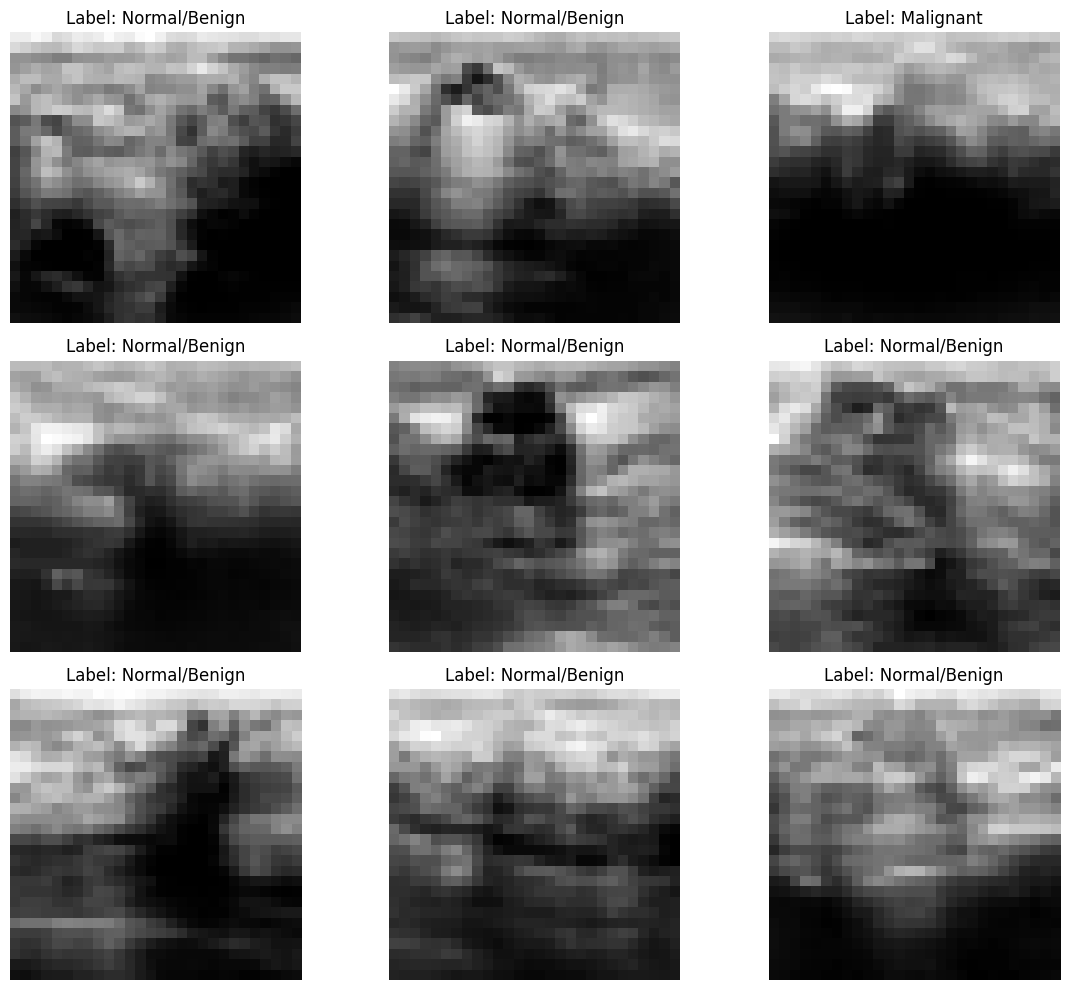

In [13]:
visualize_part(train_dataset, 9, True)

**Creating a Convolutional Neural Network to Classify Breast Cancer Tumors**

In this code, I construct a convolutional neural network (CNN) to classify breast ultrasound images. I start by importing the necessary libraries, including TensorFlow and Keras, which provide the tools I need to build and train the model.

I initialize a Sequential model called breast_cancer_model, which allows me to build my neural network layer by layer. The first set of layers I add are convolutional layers, which are essential for extracting features from images. I include a 2D convolutional layer with 32 filters of size 3x3, applying ReLU activation and using "same" padding to maintain the input size. This is followed by a max pooling layer that reduces the spatial dimensions of the feature maps.

Next, I add a second convolutional layer with 64 filters, again using ReLU activation and "same" padding, followed by another max pooling layer. I repeat this process with a third convolutional layer with 128 filters and its corresponding max pooling layer. This structure allows the model to learn increasingly complex features at each layer.

After the convolutional layers, I flatten the output to convert the 2D feature maps into a 1D vector, which I then feed into a fully connected dense layer with 256 units and ReLU activation. To prevent overfitting, I apply dropout with a rate of 0.5, which randomly drops half of the neurons during training. Finally, I add a dense output layer with a single unit and a sigmoid activation function, suitable for binary classification.

To prepare for training, I compile the model using the Adam optimizer, binary cross-entropy loss (appropriate for binary classification), and accuracy as the evaluation metric. I then fit the model to the training data using data augmentation from the datagen instance, training it for 100 epochs while including callbacks to monitor training.

During training, I also validate the model on the validation dataset and utilize class weights to address any class imbalance. After training, I visualize the architecture of the model using plot_model, saving the diagram as an image file named 'breast_cancer_model.png'.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5441 - loss: 1.4460 - val_accuracy: 0.5897 - val_loss: 0.6890
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 961ms/step - accuracy: 0.5818 - loss: 0.6614 - val_accuracy: 0.6795 - val_loss: 0.6668
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 959ms/step - accuracy: 0.6517 - loss: 0.6660 - val_accuracy: 0.5641 - val_loss: 0.6740
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5084 - loss: 0.6927 - val_accuracy: 0.7308 - val_loss: 0.5772
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 936ms/step - accuracy: 0.6704 - loss: 0.6072 - val_accuracy: 0.8077 - val_loss: 0.5305
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6923 - loss: 0.5995 - val_accuracy: 0.7949 - val_loss: 0.4702
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 948ms/step - accuracy: 0.7507 - loss: 0.5665 - val_accuracy: 0.8333 - val_loss: 0.5045
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 937ms/step - accuracy: 0.6754 - loss: 0.6636 - val_accuracy: 0.7564 

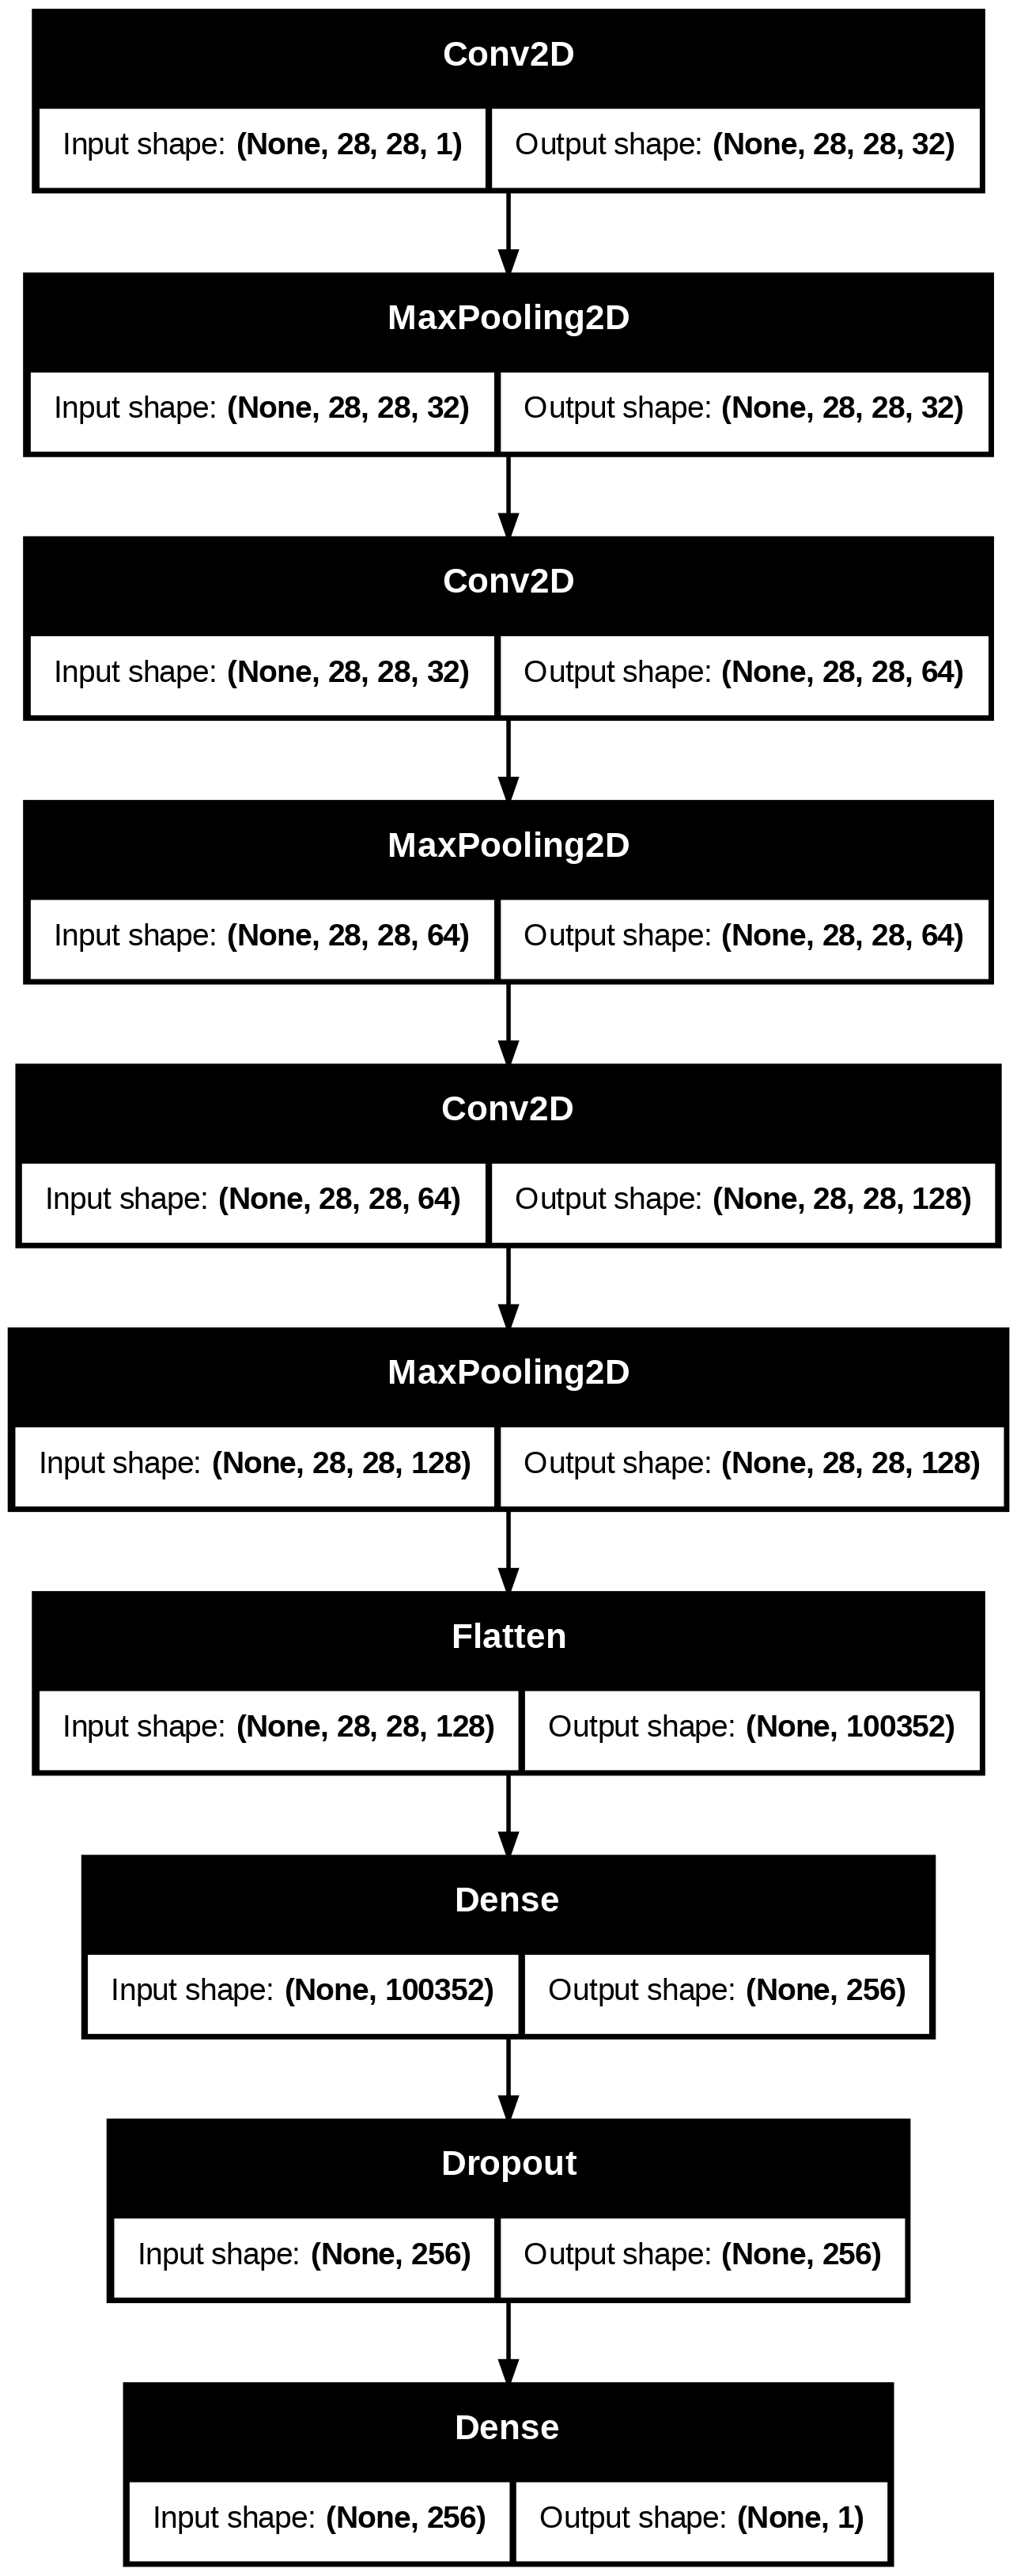

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import plot_model

# Initialize the model
breast_cancer_model = Sequential()

# Convolutional layers
breast_cancer_model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
breast_cancer_model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

breast_cancer_model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
breast_cancer_model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

breast_cancer_model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
breast_cancer_model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

# Flatten the output from the convolutional layers
breast_cancer_model.add(Flatten())
breast_cancer_model.add(Dense(256, activation="relu"))
breast_cancer_model.add(Dropout(0.5))  # Dropout for regularization
breast_cancer_model.add(Dense(1, activation="sigmoid"))  # Sigmoid for binary classification

# Compile the model
breast_cancer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_breast_cancer = breast_cancer_model.fit(datagen.flow(train_dataset.imgs, train_dataset.labels),
                                                epochs=100,
                                                callbacks=my_callbacks,
                                                validation_data=(val_dataset.imgs, val_dataset.labels),
                                                shuffle=True,
                                                class_weight=breast_class_weights)

# Visualize the model architecture
plot_model(breast_cancer_model, show_shapes=True, to_file='breast_cancer_model.png')

In [15]:
# Predictions on test dataset
test_predict = breast_cancer_model.predict(test_dataset.imgs, verbose=0)
test_predict_labels = np.where(test_predict > 0.5, 1, 0)

Accuracy: 0.8012820512820513
Precision: 0.8267716535433071
Recall: 0.9210526315789473
F1 Score: 0.8713692946058091
ROC AUC Score: 0.8613199665831244

Classification report:
               precision    recall  f1-score   support

    Malignant       0.69      0.48      0.56        42
Normal/Benign       0.83      0.92      0.87       114

     accuracy                           0.80       156
    macro avg       0.76      0.70      0.72       156
 weighted avg       0.79      0.80      0.79       156

Confusion Matrix:


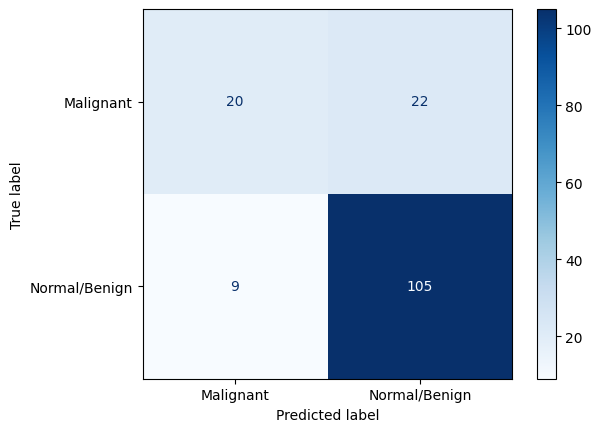

In [16]:
# Model evaluation
evaluate_model(test_dataset.labels, test_predict_labels, test_predict, ["Malignant", "Normal/Benign"])

**Classification Report Breakdown:**

*Malignant Class:*

**Precision: 0.69 (or 69%)**

This lower precision indicates that when the model predicts a sample as "Malignant," it is correct only 69% of the time. This could lead to false alarms, causing unnecessary stress or further medical procedures for patients.

**Recall: 0.48 (or 48%)**

A recall of 48% means the model only correctly identifies 69% of actual malignant cases. This suggests that there are a significant number of malignant cases being missed (false negatives), which is concerning in a medical context.

**F1 Score: 0.56 (or 56%)**

The F1 score for malignant cases reflects the trade-off between precision and recall, indicating the model's performance on this class needs improvement.

*Normal/Benign Class:*

**Precision: 0.83 (or 83%)**

This high precision signifies that the model is effective at identifying benign images, with a low likelihood of misclassifying malignant cases as benign.

**Recall: 0.92 (or 92%)**

The recall value indicates the model is successful in detecting benign cases with few false negatives, which is critical for patient care.

**F1 Score: 0.87 (or 87%)**

The F1 score for benign cases is strong, suggesting the model performs well in this category.

**Conclusion:**

The CNN model shows overall good performance with high accuracy, precision, recall, and F1 scores for benign cases. However, the performance for malignant cases is comparatively lower, indicating a potential area for improvement. This could involve techniques like adjusting the classification threshold, using different architectures, or incorporating additional data for training. In medical imaging, prioritizing recall for malignant cases is particularly important to ensure that as many cases as possible are correctly identified to avoid missed diagnoses. Further refinement and evaluation of the model could help achieve better balance in performance across both classes.

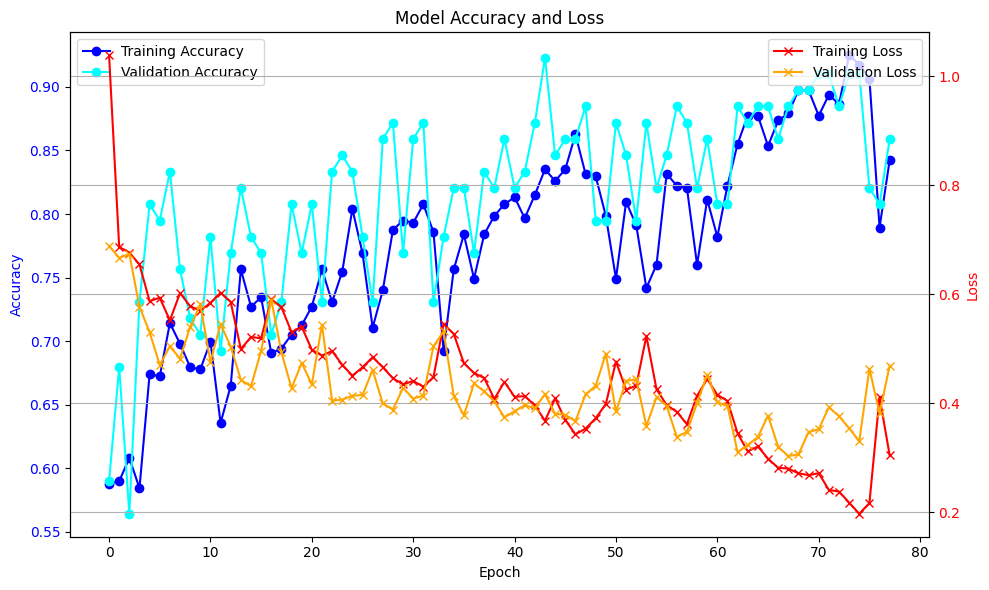

In [17]:
plot_model_performance(history_breast_cancer)

**Trying a GoogLeNet-Inspired Architecture for a Neural Network**

I first define an inception_module function that constructs a single Inception module, incorporating multiple convolutional paths. This includes a 1x1 convolution to capture features at a small scale, a 3x3 convolution with a preceding 1x1 reduction layer to learn richer features, and a 5x5 convolution with a 1x1 reduction for capturing larger patterns. Additionally, a max pooling layer is included to reduce spatial dimensions while extracting features. The outputs from these paths are concatenated, allowing the model to learn multiple levels of features simultaneously.

Next, I define a googlenet function that sets up the overall architecture of the model. It begins with an input layer that accepts grayscale images of size 28x28 pixels, followed by an initial convolutional layer, max pooling, and batch normalization to stabilize learning. I incorporate multiple Inception modules to help the model learn complex patterns in the input data. After the Inception modules, an average pooling layer is added to further reduce spatial dimensions, followed by a flatten layer to prepare the data for fully connected layers. A dense layer with a dropout layer is included to reduce overfitting during training, culminating in an output layer with a sigmoid activation function to predict binary classes (malignant or benign).

Finally, I compile the model using the Adam optimizer, a binary cross-entropy loss function, and accuracy as a metric, preparing it for training and allowing it to adjust weights and biases based on the training data.

In [18]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, concatenate, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Inception Module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 Convolution
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    # 3x3 Convolution
    conv_3x3_reduce = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3_reduce)

    # 5x5 Convolution
    conv_5x5_reduce = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5_reduce)

    # Max Pooling
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    # Concatenate all filters
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)

    return output

# Define the GoogLeNet Model
def googlenet(input_shape):
    input_layer = Input(shape=input_shape)

    # Initial Conv and MaxPooling Layers
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    # Inception Modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)  # First Inception
    x = inception_module(x, 128, 128, 192, 32, 96, 64)  # Second Inception

    # MaxPooling Layer
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception Module
    x = inception_module(x, 192, 96, 208, 16, 48, 64)  # Third Inception

    # Average Pooling and Flatten
    x = AveragePooling2D((2, 2), strides=(1, 1))(x)
    x = Flatten()(x)

    # Fully Connected Layer and Dropout
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output Layer
    output_layer = Dense(1, activation='sigmoid')(x)

    # Define the Model
    model = Model(input_layer, output_layer)

    return model

# Define the input shape (assuming grayscale images of size 28x28)
input_shape = (28, 28, 1)

# Instantiate the model
breast_cancer_googlenet_model = googlenet(input_shape)

# Compile the model
breast_cancer_googlenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.5329 - loss: 0.9343 - val_accuracy: 0.7308 - val_loss: 0.6850
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.6092 - loss: 0.6464 - val_accuracy: 0.2692 - val_loss: 0.6976
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.5320 - loss: 0.6214 - val_accuracy: 0.7949 - val_loss: 0.6786
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.8013 - loss: 0.5079 - val_accuracy: 0.2692 - val_loss: 0.7259
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.6386 - loss: 0.6384 - val_accuracy: 0.7436 - val_loss: 0.6546
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.7016 - loss: 0.5655 - val_accuracy: 0.8462 - val_loss: 0.6724
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.7331 - loss: 0.5466 - val_accuracy: 0.7436 - val_loss: 0.6832
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.7555 - loss: 0.5025 - val_accuracy: 0.871

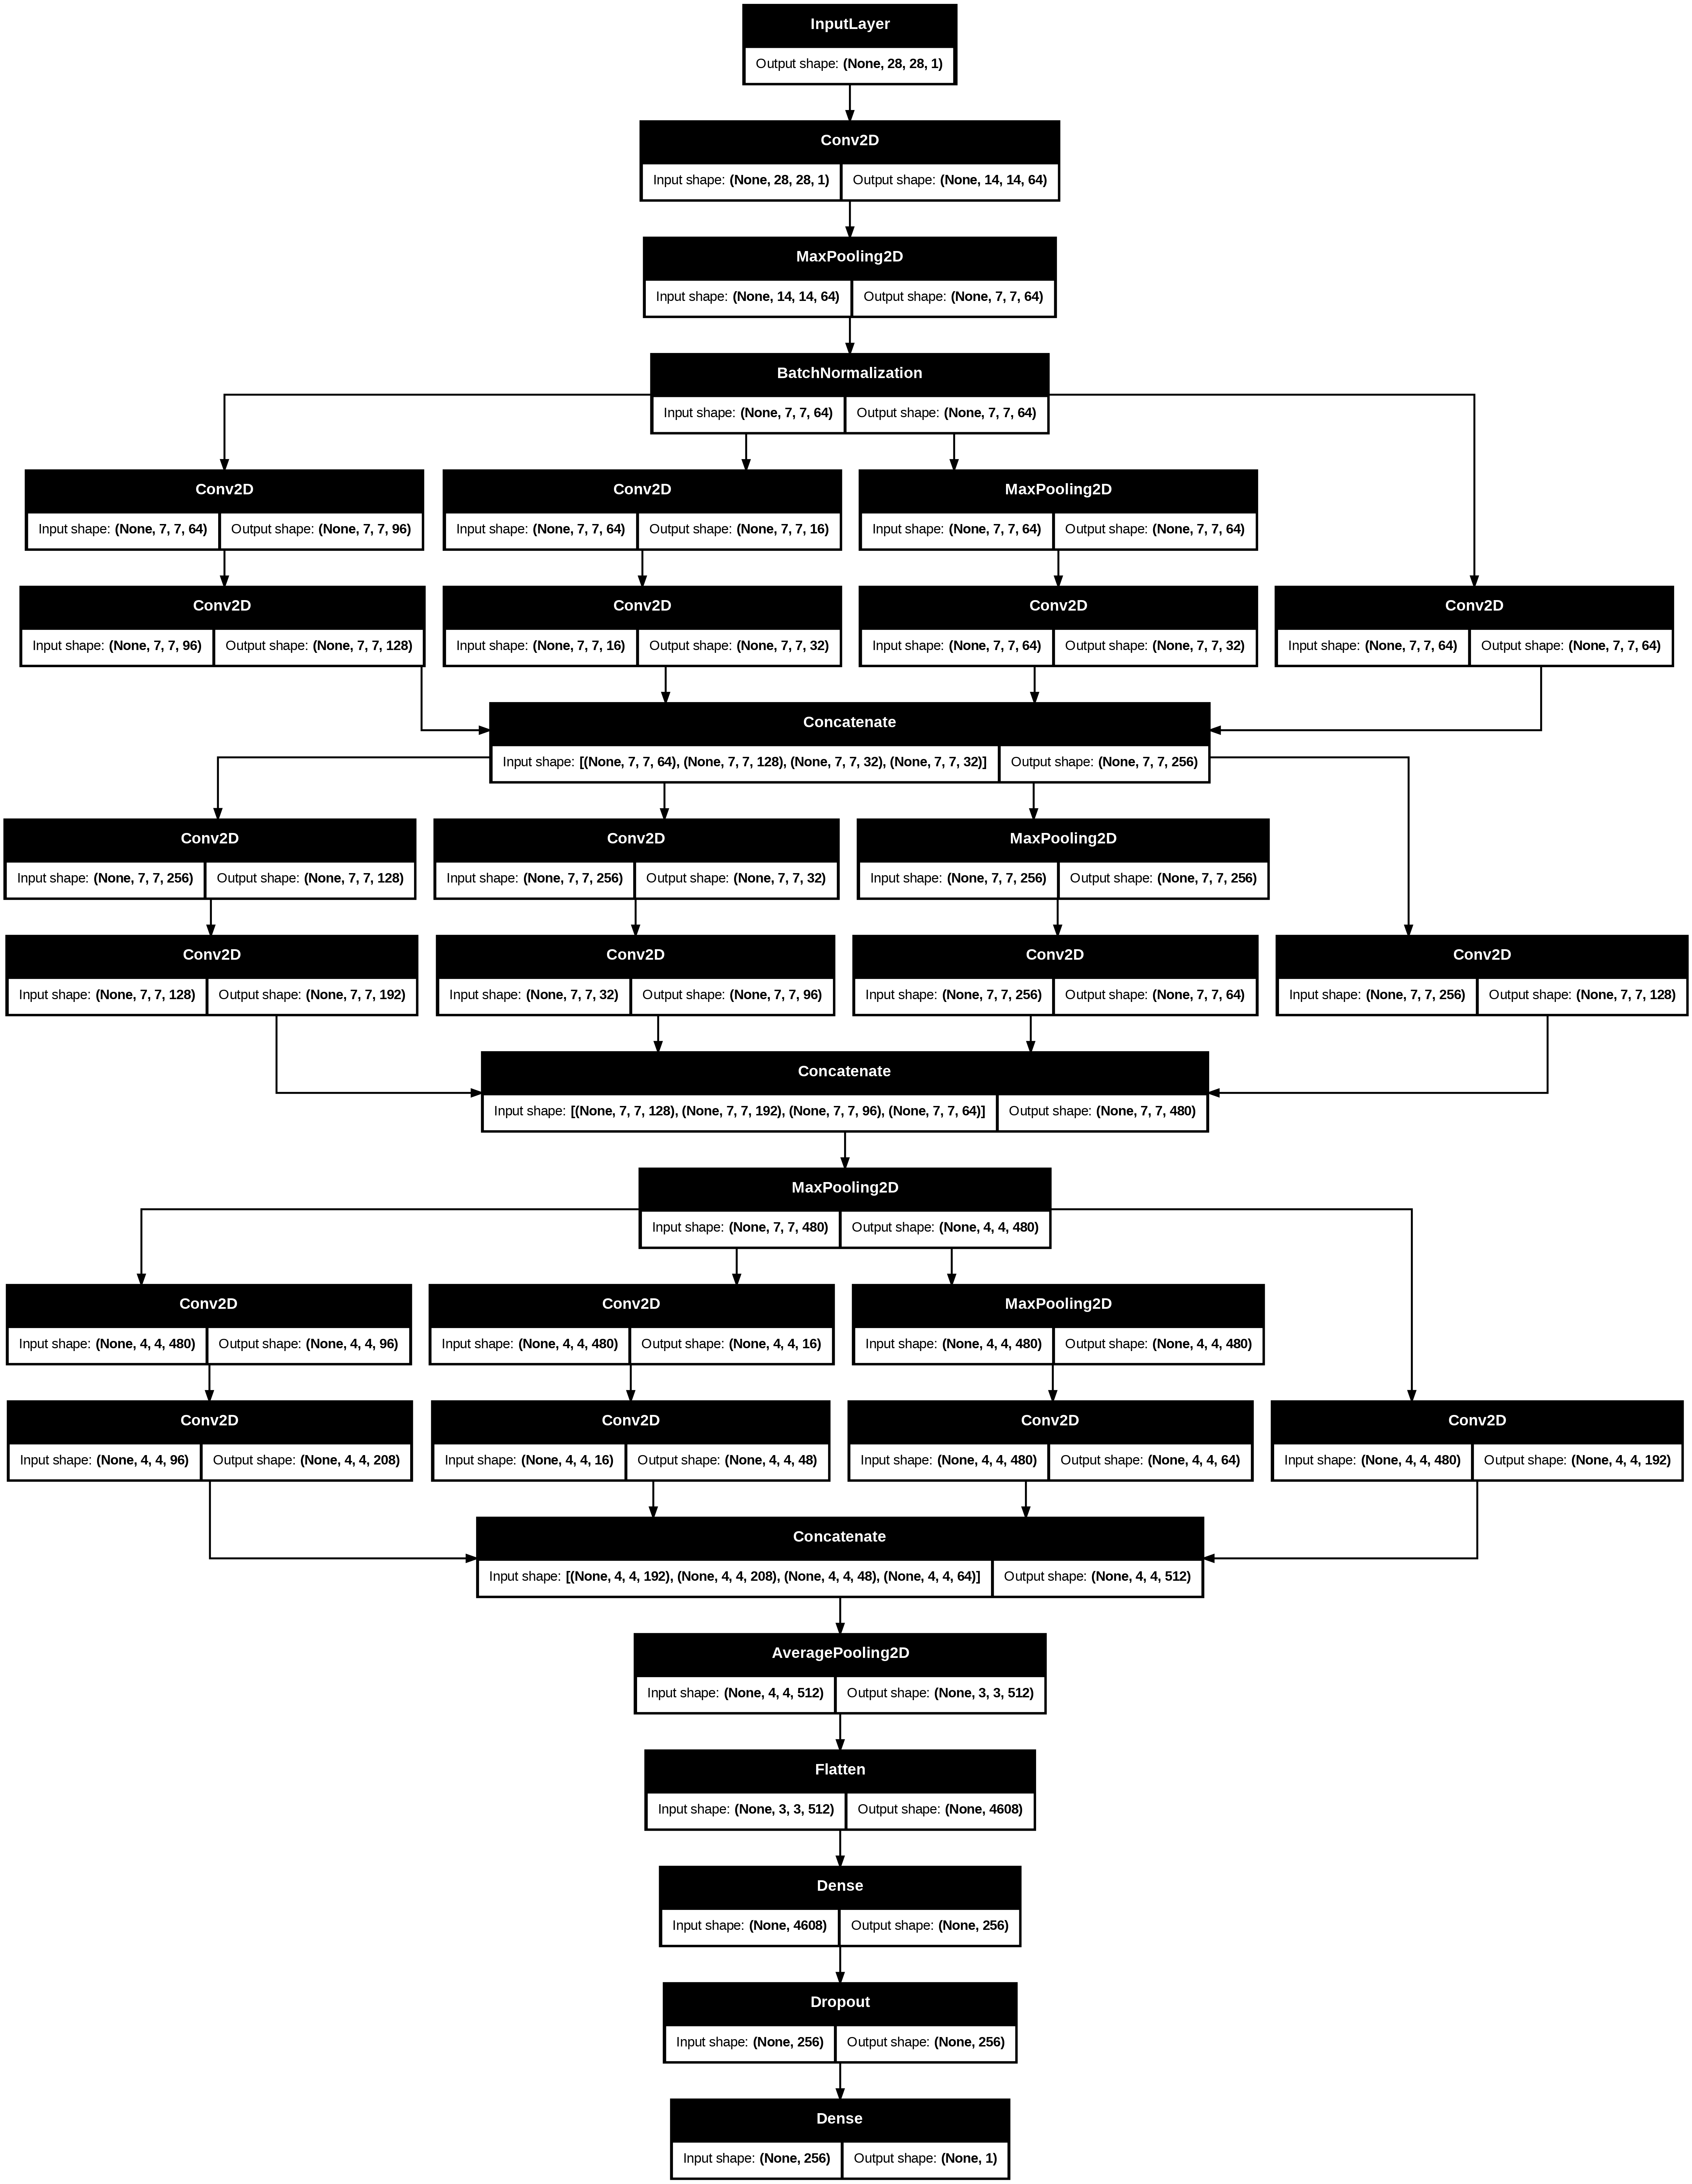

In [19]:
# Train the model
history_breast_cancer_2 = breast_cancer_googlenet_model.fit(
    datagen.flow(train_dataset.imgs, train_dataset.labels),
    epochs=100,
    callbacks=my_callbacks,
    validation_data=(val_dataset.imgs, val_dataset.labels),
    shuffle=True,
    class_weight=breast_class_weights
)

# Visualize the model architecture
plot_model(breast_cancer_googlenet_model, show_shapes=True, to_file='googlenet_breast_cancer_model.png')

In [20]:
# Predictions on test dataset
test_predict_2 = breast_cancer_googlenet_model.predict(test_dataset.imgs, verbose=0)
test_predict_labels_2 = np.where(test_predict_2 > 0.5, 1, 0)

Accuracy: 0.8461538461538461
Precision: 0.8879310344827587
Recall: 0.9035087719298246
F1 Score: 0.8956521739130435
ROC AUC Score: 0.8638262322472849

Classification report:
               precision    recall  f1-score   support

    Malignant       0.72      0.69      0.71        42
Normal/Benign       0.89      0.90      0.90       114

     accuracy                           0.85       156
    macro avg       0.81      0.80      0.80       156
 weighted avg       0.84      0.85      0.84       156

Confusion Matrix:


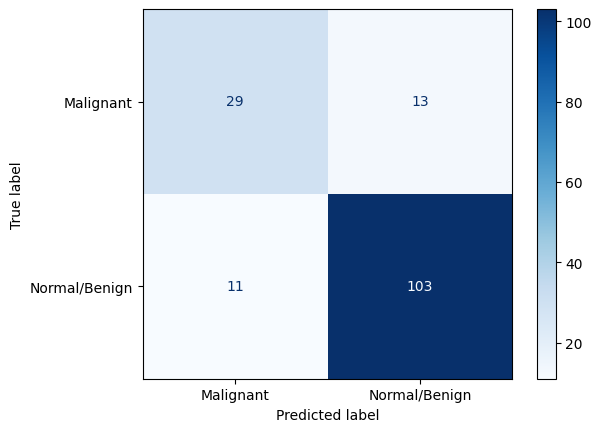

In [21]:
# Model evaluation
evaluate_model(test_dataset.labels, test_predict_labels_2, test_predict_2, ["Malignant", "Normal/Benign"])


**Classification Report Breakdown:**

*Malignant Class:*

**Precision: 0.72 (or 72%)**

This precision indicates that when the model predicts a sample as "Malignant," it is correct only 72% of the time. This relatively lower precision could result in false alarms, leading to unnecessary anxiety or additional medical procedures for patients.

**Recall: 0.69 (or 69%)**

A recall of 69% means that the model correctly identifies only 69% of actual malignant cases. This suggests that a significant number of malignant cases are being missed (false negatives), which is particularly alarming in a medical context where timely diagnosis is critical.

**F1 Score: 0.71 (or 71%)**

The F1 score for malignant cases reflects the balance between precision and recall, indicating that the model's performance on this class requires improvement. The score highlights the challenge of achieving a reliable detection of malignancy.

*Normal/Benign Class:*

**Precision: 0.89 (or 89%)**

This high precision signifies that the model is effective at identifying benign images, with a low likelihood of misclassifying malignant cases as benign. This is reassuring for patient management and treatment planning.

**Recall: 0.90 (or 90%)**

The recall value indicates that the model is highly successful in detecting benign cases with few false negatives, which is crucial for patient care and ensuring that benign cases are accurately categorized.

**F1 Score: 0.90 (or 90%)**

The F1 score for benign cases is strong, suggesting that the model performs well in this category and effectively balances precision and recall.

**Conclusion:**

The GoogLeNet model demonstrates overall good performance, particularly with high accuracy, precision, recall, and F1 scores for benign cases. However, like the first CNN, the performance for malignant cases is comparatively lower, highlighting a potential area for improvement.

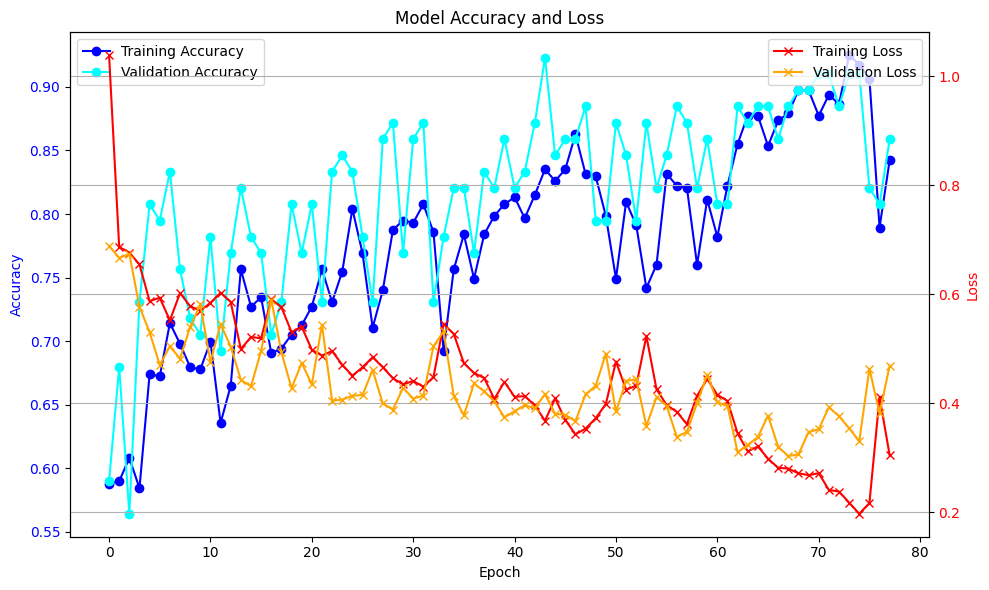

In [22]:
plot_model_performance(history_breast_cancer)